In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D  

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Dataset dimensions

In [ ]:
print(f'X_train: {x_train.shape}')
print(f'Y_train: {y_train.shape}')
print(f'X_test: {x_test.shape}')
print(f'Y_test: {y_test.shape}')

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


Show sample data

8


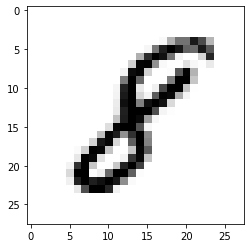

In [ ]:
image_index = 7777
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Reshaping

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Normalizing

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(f'x_train shape: {x_train.shape}')
print(f'Number of images in x_train {x_train.shape[0]}')
print(f'Number of images in x_test {x_test.shape[0]}')

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Model

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling model

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 38s 641us/step - loss: 0.6114 - accuracy: 0.8145
Epoch 2/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.2319 - accuracy: 0.9315
Epoch 3/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.1711 - accuracy: 0.9487
Epoch 4/10
60000/60000 [==============================] - 38s 632us/step - loss: 0.1430 - accuracy: 0.9571
Epoch 5/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.1245 - accuracy: 0.9621
Epoch 6/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.1081 - accuracy: 0.9668
Epoch 7/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.1018 - accuracy: 0.9693
Epoch 8/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.0924 - accuracy: 0.9712
Epoch 9/10
60000/60000 [==============================] - 36s 605us/step - loss: 0.0891 - accuracy: 0.9735
Epoch 10/10
60000/60000 [============

Evaluate model

In [ ]:
score = model.evaluate(x_test, y_test)
print(f'Test score: {score[0]}')
print(f'Test accuracy: {score[1]}')

10000/10000 [==============================] - 2s 209us/step
Test score: 0.07244788656905293
Test accuracy: 0.9768000245094299


Visualize results

In [ ]:
predicted_classes = model.predict_classes(x_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Correct results

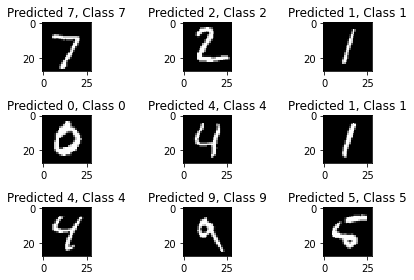

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

Incorrect results

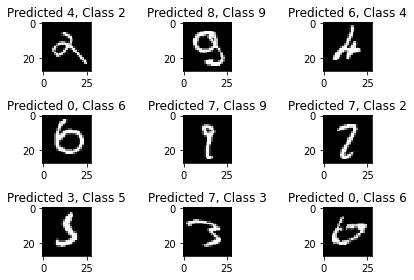

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()